In [2]:
# 导入所需要的包
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jieba

import jieba
import matplotlib.pyplot as plt
import pandas as pd
from imageio import imread  # pip install pillow
from wordcloud import WordCloud

import warnings

warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [3]:
# 读取数据
train = pd.read_excel('./data/data.xlsx')
test = pd.read_excel('./data/test.xlsx')
data_数据说明 = pd.read_excel('./data/字段说明.xlsx')

# 任务三：积极情绪最多的是哪个商家，并总结这个商家的优点有哪些。

In [4]:
train

,target,userId,sellerId,timestamp,comment
0,1,127,1708,2019-10-01 00:57:45.000003,text：订餐1个半小时不见餐，催了还挂电话！☆ ☆ ☆
1,1,1661,886,2019-10-01 00:42:07.000001,text：太不靠谱！× × 不是漏发订单就是菜送错了，要不就早送一小时！！！× ×
2,0,92758,10612,2019-10-01 00:51:18.000000,text：超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好...
3,0,1639,1699,2019-10-03 00:01:56.000001,text：谢谢快递哥哥，非常准时，辛苦啦
4,1,241839,36556,2019-10-01 00:07:56.000004,非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种\n，面条没有味道，一碗28，坑死爹...
...,...,...,...,...,...
17948,0,34025,24833,2020-09-25 23:15:36.000003,"text：感觉这里好像发挥不是很稳定,来了几此,有好有坏.吃日料主要就关注三文鱼,这里的属于..."
17949,1,656,901,2020-09-25 23:17:48.999999,text：订的九点送到，十二点才到，呵呵× × × × × × × ×
17950,1,612,743,2020-09-27 23:36:59.000000,text：差评！辣白菜五花肉石锅拌饭超级难吃！五花肉又硬又难吃，感觉不新鲜。以后再也不会吃这家店了
17951,1,146739,15687,2020-09-27 23:53:15.000000,又贵又不好吃，老婆几次非要来看看，这次一吃真难吃。\n蒸没错，但比炒菜更油腻，没啥菜好吃，以...


In [7]:
train[train['sellerId']==1041]

,target,userId,sellerId,timestamp,comment
69,0,223,1041,2019-10-04 00:18:44.999997,text：量大，味道也不错，性价比超高。
115,0,1115,1041,2019-10-03 00:15:05.999999,text：包装好用心呀，点赞！
390,0,172,1041,2019-10-08 00:31:17.999999,text：包装好漂亮！
642,0,1996,1041,2019-10-14 01:39:48.999997,"text：包装不错,味道也不错"
772,0,1935,1041,2019-10-18 02:11:36.000001,text：价格实惠，值得购买了
799,0,1240,1041,2019-10-17 02:58:52.000003,text：配送员很棒！
927,0,1118,1041,2019-10-19 02:29:20.000000,text：好吃，包装好，干净卫生
949,0,1266,1041,2019-10-20 02:21:39.999997,text：服务好，速度快，专业
1013,0,944,1041,2019-10-23 02:02:29.000002,"text：好实惠,都吃不完了"
1168,0,317,1041,2019-10-24 03:05:28.000001,text：真不错，价格便宜实惠，分量足，最满意的一家


In [8]:
train[train['sellerId']==1041]['target'].value_counts()

0    54
1     4
Name: target, dtype: int64

In [9]:
train[train['sellerId']==1041]['comment'].apply(lambda x:jieba.lcut(x))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dupeibo\AppData\Local\Temp\jieba.cache
Loading model cost 0.726 seconds.
Prefix dict has been built successfully.


69            [text, ：, 量, 大, ，, 味道, 也, 不错, ，, 性价比, 超高, 。]
115                      [text, ：, 包装, 好, 用心, 呀, ，, 点赞, ！]
390                                [text, ：, 包装, 好, 漂亮, ！]
642                        [text, ：, 包装, 不错, ,, 味道, 也, 不错]
772                        [text, ：, 价格, 实惠, ，, 值得, 购买, 了]
799                                [text, ：, 配送, 员, 很棒, ！]
927                     [text, ：, 好吃, ，, 包装, 好, ，, 干净, 卫生]
949                      [text, ：, 服务, 好, ，, 速度, 快, ，, 专业]
1013                        [text, ：, 好, 实惠, ,, 都, 吃不完, 了]
1168     [text, ：, 真不错, ，, 价格便宜, 实惠, ，, 分量, 足, ，, 最, 满意...
1181                            [text, ：, 口感, 不错, ，, 很, 好]
1200                    [text, ：, 送餐, 速度, 快, ，, 味道, 不错, 。]
1294                  [text, ：, 送达, 时间, 非常, 准时, ,, 味道, 不错]
1315                           [text, ：, 外卖, 小哥, 态度, 很, 好]
1389              [text, ：, 很, 好, ，, 速度, 很快, ,, 味道, 也, 不错]
1429         [text, ：, 工作人员, 很, 速度, ，, 服务, 好, ，, 赞, 一个, ！]
1447                        [text, ：, 便宜, 实惠, ,, 好吃, 不, 

In [10]:
text = ''
for i in train[train['sellerId']==1041]['comment'].tolist():
    text+=i.replace('text','')
text

'：量大，味道也不错，性价比超高。：包装好用心呀，点赞！：包装好漂亮！：包装不错,味道也不错：价格实惠，值得购买了：配送员很棒！：好吃，包装好，干净卫生：服务好，速度快，专业：好实惠,都吃不完了：真不错，价格便宜实惠，分量足，最满意的一家：口感不错，很好：送餐速度快，味道不错。：送达时间非常准时,味道不错：外卖小哥态度很好：很好，速度很快,味道也不错：工作人员很速度，服务好，赞一个！：便宜实惠,好吃不贵：好吃，干净：环境不错，服务员比较冷淡，中午吃人很少，牛肉还是比较实惠的，说五分熟就是五分熟，这点非常好，值得表扬\n：看着很干净：送餐还是很快的，师傅特别客气，非常好：好吃不贵，经济实惠！：口味不错。：真快！还省了15元：比在店里买方便，东西特别好！包的很规整，百度骑士态度也特别好。赞：还不错的啊：吃的很饱！一分价钱一分货：大风天，骑士辛苦！好评！：不错，料很足…………：特别好喝，经常定，快递小哥非常好。：不错不错？，服务很好，点赞：还有垫纸，非常贴心。：好吃，真的是大肘子肉：很值啊！用来订，味道好吃不腻。：非常好。送的也特别快。棒棒哒！：环境很不错，口味也不错，水煮鱼和烤鸭味道很好。价格适中，家庭聚会可以选这里，有单间有车位，地理位置也挺方便挺好找的。\n：外送小哥态度很好，很辛苦。：快递员服务非常好,食品也不错：很好吃,送餐速度也还不错,还送了一个王老吉饮料：纯素蔬菜卷，好多香菇，对不吃香菇的人来说，要疯了....：准时送到，辛苦辛苦，谢谢！：感觉肉已经坏了，有股怪味道：很准时，满意。：味道不错，送货快：送餐员服务很好。很满意，：大冷天，快递小哥微笑服务，手动赞一个：我真的备注了不要放肉沫，，那肉沫还是放了，放了那么多，：满意，很好，配送给力食物好吃：4块钱超值的！！！：美味，及时，经常订，希望优惠力度再大些：送餐及时，服务热情，美味：挺实惠的，吃撑了：送了一个多小时：还挺快的～,味道也不错。赞：我真的只能说，皇太吉太不要脸了，7点下单，8点50送到。还自己确认物流在7点40送达。奇差无比：很实惠，都是肉，还赠送泡菜和皮蛋瘦肉粥：实在难吃，什么肘子，就几块瘦肉吧了：价格合适，面有些硬'

In [11]:
train['']

KeyError: ''

In [ ]:
weight.max()

In [ ]:
from jieba import analyse
tfidf = analyse.extract_tags
keywords = tfidf(text)
keywords

In [14]:
from jieba import analyse
lis = jieba.analyse.extract_tags(text, withWeight = True, topK=10)   # 要求返回权重值


In [31]:
score = pd.DataFrame(columns=['关键词','权重'])
score['关键词'] = [i[0] for i in lis]
score['权重'] = [i[1] for i in lis]
score

,关键词,权重
0,不错,0.445365
1,味道,0.277857
2,实惠,0.256442
3,好吃,0.245411
4,送餐,0.181133
5,小哥,0.177325
6,非常,0.130011
7,服务,0.121413
8,辛苦,0.114051
9,快递,0.113971


0.4453653126375 不错
0.27785654098257573 味道
0.2564423740318182 实惠
0.24541088716969695 好吃
0.18113284095303028 送餐
0.1773250465848485 小哥
0.13001129183477272 非常
0.12141251356977271 服务
0.1140508767030303 辛苦
0.11397132546704547 快递


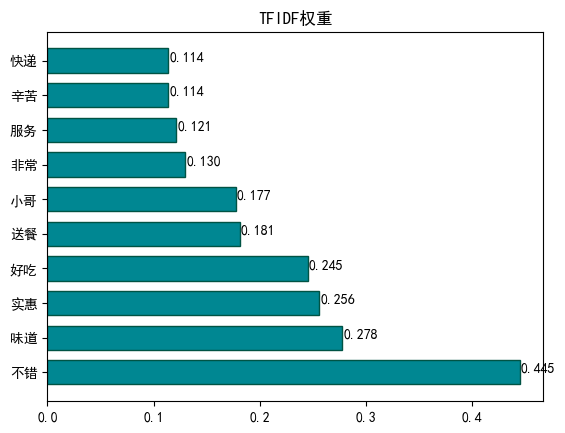

In [30]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.barh(score['关键词'], score['权重'], height=0.7, color='#008792', edgecolor='#005344') 
plt.title('TFIDF权重') # 标题
for a,b in zip( score['权重'],score['关键词']): 
   print(a,b)
   plt.text(a+0.001, b,'%.3f'%float(a)) 
plt.show()

In [44]:
train['comment'].apply(lambda x :x.replace('text',''))

0                                ：订餐1个半小时不见餐，催了还挂电话！☆ ☆ ☆ 
1                   ：太不靠谱！× × 不是漏发订单就是菜送错了，要不就早送一小时！！！× × 
2        ：超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好的。推荐...
3                                         ：谢谢快递哥哥，非常准时，辛苦啦
4        非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种\n，面条没有味道，一碗28，坑死爹...
                               ...                        
17948    ：感觉这里好像发挥不是很稳定,来了几此,有好有坏.吃日料主要就关注三文鱼,这里的属于中等,不...
17949                     ：订的九点送到，十二点才到，呵呵× × × × × × × × 
17950        ：差评！辣白菜五花肉石锅拌饭超级难吃！五花肉又硬又难吃，感觉不新鲜。以后再也不会吃这家店了
17951    又贵又不好吃，老婆几次非要来看看，这次一吃真难吃。\n蒸没错，但比炒菜更油腻，没啥菜好吃，以...
17952         ：小炒肉太辣，辣椒放太多，凉粉更辣！还有就是连筷子都不给难道要用手抓着吃吗？× × × 
Name: comment, Length: 17953, dtype: object

In [45]:
# 建立一个语料库
corpus = train['comment'].apply(lambda x :x.replace('text','')).tolist()
# 进行分词
words = []
for i in corpus:
    words.append(i.split(" "))
print(words)

[['：订餐1个半小时不见餐，催了还挂电话！☆', '☆', '☆', ''], ['：太不靠谱！×', '×', '不是漏发订单就是菜送错了，要不就早送一小时！！！×', '×', ''], ['：超级超级喜欢吃，每次去都好开心，口味很好，建议手套多戴几双，吃完之后的形象是不太好的。推荐推荐，还能顺便逛逛田林路\n'], ['：谢谢快递哥哥，非常准时，辛苦啦'], ['非常差得餐厅，上菜非常慢，且贵！属于可以在餐厅饿死的那种\n，面条没有味道，一碗28，坑死爹！！！！！！\n'], ['：这里绝对是我这种超爱美食滴小孩', '大大大额天堂来了`~\n芋贵人和宝珠奶酪\n是每次必去的了！', '不知道还有没有分店的`\n'], ['：送了两个多小时,连个解释都没有,还是我真的打电话过去问的,醉了×', '×', '×', ''], ['：吃起来不方便...,而且似乎有股异味..,闻起来。'], ['：花蛤里全是沙子☆', '☆', '☆', ''], ['：＆＆＆＆＆汤包还是挺好吃的,再次订了'], ['：味道不错，很实惠'], ['定位困难，过来一看都是吃盒饭的。菜量少的可怜,服务员就2个，烤肉一点也不好，老的不得了，以后绝对不会再光顾\n'], ['：包子都不想说啥了'], ['：买了好几次了都没问题，但这次的咖啡不知为什么上面一层油，幸亏打开盖看了一下，要不就喝进去了'], ['：不得不说今天餐厅做菜的速度非常非常的慢'], ['：送的可乐没给×', '×', '×', ''], ['：薯条皮了，奶酪棒没味道'], ['：耗费时间久，卖家态度不认真，食物不齐全，'], ['：妈妈很喜欢他家的泡菜,当宝贝一样'], ['坑爹啊，钱没了，蛋糕也没吃到。在也不想去这家吃了，伤不起啊…………………………………………………………………\n'], ['：什么叫完美~,订了口口香~优谷你就知道，不是打广告,真的非常棒，味道，菜色，必须赞，足足足！,百度骑士非常给力。服务是想当热情，在楼下非常正式的军姿等待我真的们取餐，双手端饭送给我真的们，还祝我真的们用餐愉快，一双墨镜透着帅气~'], ['：交通挺方便的,10号线紫藤路站出来就是,服务很好,里面的鱼都学精了,不太容易钓得到,船头机会大一些.三文鱼很好吃.\n'], ['：很不错，速度也很快。＆＆'], ['：！！很不错，新

In [63]:
train[train['sellerId']==1041]['comment'].apply(lambda x:jieba.lcut(x))

69            [text, ：, 量, 大, ，, 味道, 也, 不错, ，, 性价比, 超高, 。]
115                      [text, ：, 包装, 好, 用心, 呀, ，, 点赞, ！]
390                                [text, ：, 包装, 好, 漂亮, ！]
642                        [text, ：, 包装, 不错, ,, 味道, 也, 不错]
772                        [text, ：, 价格, 实惠, ，, 值得, 购买, 了]
799                                [text, ：, 配送, 员, 很棒, ！]
927                     [text, ：, 好吃, ，, 包装, 好, ，, 干净, 卫生]
949                      [text, ：, 服务, 好, ，, 速度, 快, ，, 专业]
1013                        [text, ：, 好, 实惠, ,, 都, 吃不完, 了]
1168     [text, ：, 真不错, ，, 价格便宜, 实惠, ，, 分量, 足, ，, 最, 满意...
1181                            [text, ：, 口感, 不错, ，, 很, 好]
1200                    [text, ：, 送餐, 速度, 快, ，, 味道, 不错, 。]
1294                  [text, ：, 送达, 时间, 非常, 准时, ,, 味道, 不错]
1315                           [text, ：, 外卖, 小哥, 态度, 很, 好]
1389              [text, ：, 很, 好, ，, 速度, 很快, ,, 味道, 也, 不错]
1429         [text, ：, 工作人员, 很, 速度, ，, 服务, 好, ，, 赞, 一个, ！]
1447                        [text, ：, 便宜, 实惠, ,, 好吃, 不, 

In [12]:
words = jieba.lcut(text)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\dupeibo\AppData\Local\Temp\jieba.cache
Loading model cost 0.685 seconds.
Prefix dict has been built successfully.


In [13]:
stop = pd.read_csv('E:\\Learn File\\大一\\大一爬虫\\spider\\week8\\word_cloud\\stoplist.txt', header=None, encoding='utf-8',engine='python', sep='limh')
b = stop.drop_duplicates()
stop = [' ', '　'] + list(stop[0])
# stop1 = [chr(32), chr(12288)] + list(stop[0])
stop = set(stop)
# 去停用词
words = [word for word in words if word not in stop]
word_num = pd.DataFrame(words, columns=['word'])
word_num = word_num[word_num['word'] != '\n']
word_num['count'] = 1
word_num = word_num.groupby('word').sum()
word_many = word_num[word_num['count'] > 2]

In [17]:
word_num.sort_values(by='count',ascending=False)[:10]

,count
word,
不错,19
味道,10
实惠,8
好吃,8
服务,6
特别,5
速度,5
送,4
包装,4


C:\Users\dupeibo\AppData\Local\Temp\ipykernel_14036\2563797964.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  back_pic = imread("E:\\111.jpg")  # aixin.jpg # 设置背景图片


(-0.5, 1199.5, 957.5, -0.5)

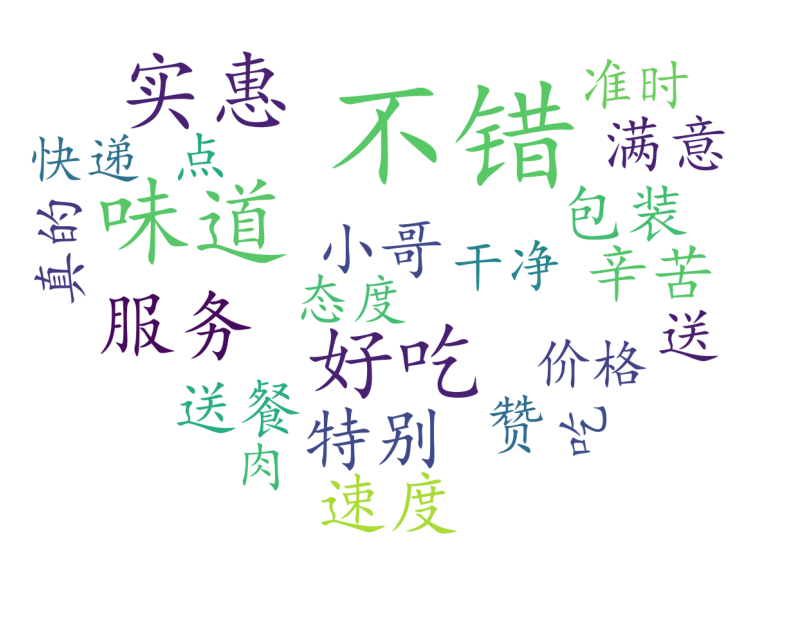

In [25]:

# 背景图片
back_pic = imread("E:\\111.jpg")  # aixin.jpg # 设置背景图片
wc = WordCloud(font_path='C:\\Windows\\Fonts\\simkai.TTF',  # 设置字体 使用的 windows 自带的字体
               background_color="white",  # ="white", #背景颜色
               max_words=2000,  # 词云显示的最大数
               mask=back_pic,  # 设置背景图片
               max_font_size=200,  # =200, #字体最大值
               random_state=42, )

# 生成词云
wc.fit_words(word_many['count'])

# 绘图
plt.figure(figsize=(16, 8))
plt.imshow(wc)
plt.axis('off')